 - 'rto - daily-region-data'
 - 'rto - daily-fuel-type-data'

In [ ]:
import eia
import pandas as pd
import matplotlib.pyplot as plt

## Daily region data (10/13/22 - 11/18/22)

In [5]:
df = pd.read_csv('./data/data/rto/csv/daily-region-data_data.csv')

In [6]:
df.head(10)

,Unnamed: 0,period,respondent,respondent-name,type,type-name,timezone,timezone-description,value,value-units
0,0.0,2022-11-18,PGE,Portland General Electric Company,DF,Day-ahead demand forecast,Pacific,Pacific,68859,megawatthours
1,1.0,2022-11-18,CHPD,Public Utility District No. 1 of Chelan County,DF,Day-ahead demand forecast,Eastern,Eastern,7660,megawatthours
2,2.0,2022-11-18,WAUW,Western Area Power Administration - Upper Grea...,DF,Day-ahead demand forecast,Arizona,Arizona,2753,megawatthours
3,3.0,2022-11-18,TEPC,Tucson Electric Power,DF,Day-ahead demand forecast,Eastern,Eastern,35751,megawatthours
4,4.0,2022-11-18,TPWR,"City of Tacoma, Department of Public Utilities...",DF,Day-ahead demand forecast,Eastern,Eastern,16790,megawatthours
5,5.0,2022-11-18,TIDC,Turlock Irrigation District,DF,Day-ahead demand forecast,Mountain,Mountain,7030,megawatthours
6,6.0,2022-11-18,WACM,Western Area Power Administration - Rocky Moun...,DF,Day-ahead demand forecast,Central,Central,82330,megawatthours
7,7.0,2022-11-18,SW,Southwest,DF,Day-ahead demand forecast,Mountain,Mountain,192616,megawatthours
8,8.0,2022-11-18,EPE,El Paso Electric Company,DF,Day-ahead demand forecast,Arizona,Arizona,20325,megawatthours
9,9.0,2022-11-18,TVA,Tennessee Valley Authority,DF,Day-ahead demand forecast,Central,Central,517752,megawatthours


In [24]:
df_timezone = pd.DataFrame(df['timezone'].value_counts())
df_timezone = df_timezone.drop(['timezone'])
sum1 = [0] * 5
for idx, row in df.iterrows():
    if row['timezone'] == 'Eastern':
        sum1[0] += int(row['value'])
    elif row['timezone'] == 'Central':
        sum1[1] += int(row['value'])
    elif row['timezone'] == 'Mountain':
        sum1[2] += int(row['value'])
    elif row['timezone'] == 'Arizona':
        sum1[3] += int(row['value'])
    elif row['timezone'] == 'Pacific':
        sum1[4] += int(row['value'])
df_timezone['total value'] = sum1

In [25]:
df_timezone

,timezone,total value
Eastern,10351,3102238397
Central,10075,2974680494
Mountain,9934,2931843834
Arizona,9883,2867712038
Pacific,9757,2864980126


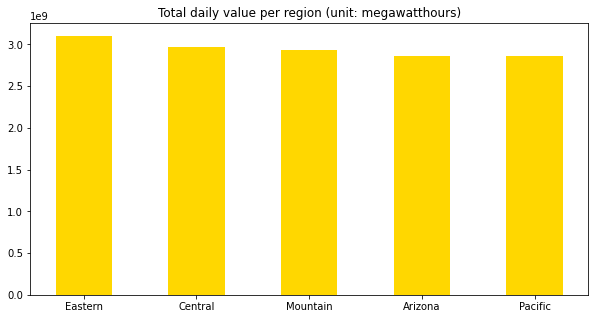

In [89]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(['Eastern', 'Central', 'Mountain', 'Arizona', 'Pacific'], df_timezone['total value'], width=0.5, color='gold')
plt.title('Total daily value per region (unit: megawatthours)')
plt.show()

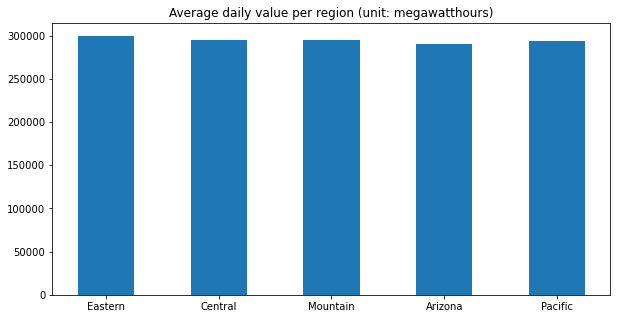

In [90]:
plt.bar(['Eastern', 'Central', 'Mountain', 'Arizona', 'Pacific'], df_timezone['total value'] / df_timezone['timezone'], width=0.5)
plt.title('Average daily value per region (unit: megawatthours)')
plt.show()

In [97]:
res = dict(df['respondent'].value_counts())
for key in res:
    res[key] = 0
for idx, row in df.iterrows():
    try:
        res[row['respondent']] += int(row['value'])
    except ValueError:
        continue
res = dict(sorted(res.items(), key=lambda item: item[1], reverse=True))
del res['respondent']

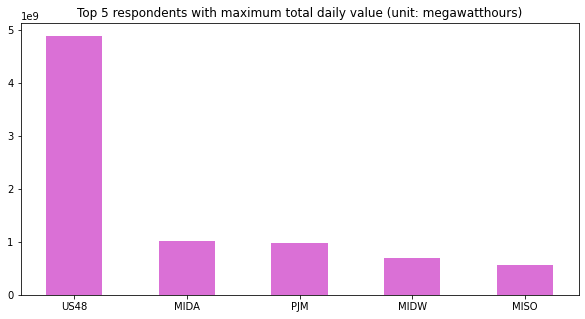

In [98]:
top5 = []
top5_value = []
for key in res:
    if len(top5) < 5:
        top5.append(key)
        top5_value.append(res[key])
plt.bar(top5, top5_value, width=0.5, color='orchid')
plt.title('Top 5 respondents with maximum total daily value (unit: megawatthours)')
plt.show()

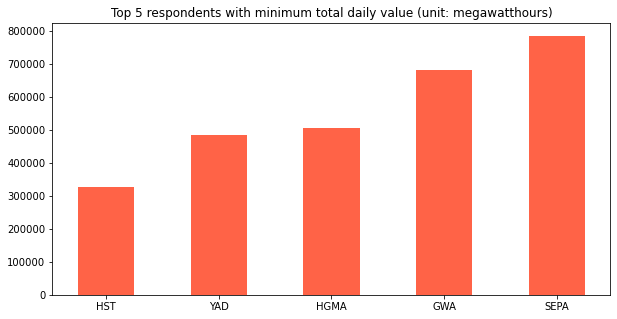

In [99]:
res = dict(sorted(res.items(), key=lambda item: item[1]))
top5 = []
top5_value = []
for key in res:
    if len(top5) < 5:
        top5.append(key)
        top5_value.append(res[key])
plt.bar(top5, top5_value, width=0.5, color='tomato')
plt.title('Top 5 respondents with minimum total daily value (unit: megawatthours)')
plt.show()

## Daily fuel type data (10/22/22 - 11/17/22)

In [100]:
df = pd.read_csv('./data/data/rto/csv/daily-fuel-type-data_data.csv')

In [101]:
df.head(10)

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
0,0.0,2022-11-17,BANC,Balancing Authority of Northern California,WAT,Hydro,Pacific,Pacific,3339,megawatthours
1,1.0,2022-11-17,PSCO,Public Service Company of Colorado,OIL,Petroleum,Eastern,Eastern,-5,megawatthours
2,2.0,2022-11-17,HGMA,"New Harquahala Generating Company, LLC",NG,Natural gas,Arizona,Arizona,-35,megawatthours
3,3.0,2022-11-17,NW,Northwest,WND,Wind,Arizona,Arizona,123276,megawatthours
4,4.0,2022-11-17,NW,Northwest,WND,Wind,Mountain,Mountain,123276,megawatthours
5,5.0,2022-11-17,NEVP,Nevada Power Company,SUN,Solar,Eastern,Eastern,13766,megawatthours
6,6.0,2022-11-17,SWPP,Southwest Power Pool,COL,Coal,Eastern,Eastern,221217,megawatthours
7,7.0,2022-11-17,DUK,Duke Energy Carolinas,COL,Coal,Eastern,Eastern,77825,megawatthours
8,8.0,2022-11-17,PSEI,"Puget Sound Energy, Inc.",OTH,Other,Eastern,Eastern,664,megawatthours
9,9.0,2022-11-17,IPCO,Idaho Power Company,OIL,Petroleum,Mountain,Mountain,0,megawatthours


In [104]:
tn = dict(df['type-name'].value_counts())
for key in tn:
    tn[key] = 0
for idx, row in df.iterrows():
    try:
        tn[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tn = dict(sorted(tn.items(), key=lambda item: item[1], reverse=True))
del tn['type-name']

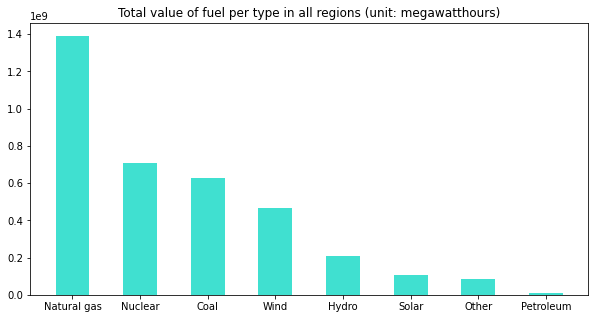

In [113]:
plt.bar(tn.keys(), tn.values(), color='turquoise', width=0.5)
plt.title('Total value of fuel per type in all regions (unit: megawatthours)')
plt.show()

In [116]:
df_e = df.loc[df['timezone'] == 'Eastern']
df_e.head()

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
1,1.0,2022-11-17,PSCO,Public Service Company of Colorado,OIL,Petroleum,Eastern,Eastern,-5,megawatthours
5,5.0,2022-11-17,NEVP,Nevada Power Company,SUN,Solar,Eastern,Eastern,13766,megawatthours
6,6.0,2022-11-17,SWPP,Southwest Power Pool,COL,Coal,Eastern,Eastern,221217,megawatthours
7,7.0,2022-11-17,DUK,Duke Energy Carolinas,COL,Coal,Eastern,Eastern,77825,megawatthours
8,8.0,2022-11-17,PSEI,"Puget Sound Energy, Inc.",OTH,Other,Eastern,Eastern,664,megawatthours


In [118]:
tne = dict(df_e['type-name'].value_counts())
for key in tne:
    tne[key] = 0
for idx, row in df_e.iterrows():
    try:
        tne[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tne = dict(sorted(tne.items(), key=lambda item: item[1], reverse=True))

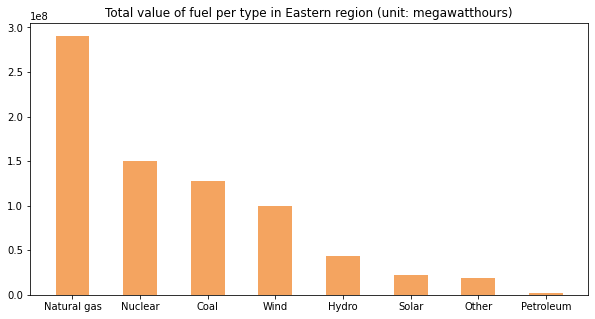

In [121]:
plt.bar(tne.keys(), tne.values(), color='sandybrown', width=0.5)
plt.title('Total value of fuel per type in Eastern region (unit: megawatthours)')
plt.show()

In [122]:
df_c = df.loc[df['timezone'] == 'Central']
df_c.head()

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
22,22.0,2022-11-17,SW,Southwest,WAT,Hydro,Central,Central,10639,megawatthours
32,32.0,2022-11-17,WWA,"NaturEner Wind Watch, LLC",WND,Wind,Central,Central,3051,megawatthours
35,35.0,2022-11-17,PSCO,Public Service Company of Colorado,WAT,Hydro,Central,Central,460,megawatthours
36,36.0,2022-11-17,PACW,PacifiCorp West,WND,Wind,Central,Central,68,megawatthours
40,40.0,2022-11-17,TVA,Tennessee Valley Authority,NUC,Nuclear,Central,Central,177285,megawatthours


In [123]:
tnc = dict(df_c['type-name'].value_counts())
for key in tnc:
    tnc[key] = 0
for idx, row in df_c.iterrows():
    try:
        tnc[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tnc = dict(sorted(tnc.items(), key=lambda item: item[1], reverse=True))

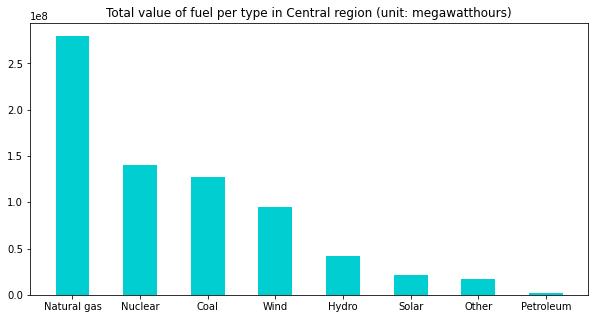

In [124]:
plt.bar(tnc.keys(), tnc.values(), color='darkturquoise', width=0.5)
plt.title('Total value of fuel per type in Central region (unit: megawatthours)')
plt.show()

In [125]:
df_m = df.loc[df['timezone'] == 'Mountain']
df_m.head()

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
4,4.0,2022-11-17,NW,Northwest,WND,Wind,Mountain,Mountain,123276,megawatthours
9,9.0,2022-11-17,IPCO,Idaho Power Company,OIL,Petroleum,Mountain,Mountain,0,megawatthours
10,10.0,2022-11-17,AVA,Avista Corporation,NG,Natural gas,Mountain,Mountain,6976,megawatthours
13,13.0,2022-11-17,CISO,California Independent System Operator,OTH,Other,Mountain,Mountain,9954,megawatthours
15,15.0,2022-11-17,SW,Southwest,OTH,Other,Mountain,Mountain,926,megawatthours


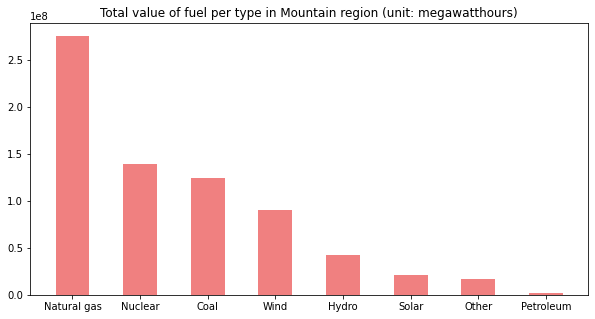

In [126]:
tnm = dict(df_m['type-name'].value_counts())
for key in tnm:
    tnm[key] = 0
for idx, row in df_m.iterrows():
    try:
        tnm[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tnm = dict(sorted(tnm.items(), key=lambda item: item[1], reverse=True))
plt.bar(tnm.keys(), tnm.values(), color='lightcoral', width=0.5)
plt.title('Total value of fuel per type in Mountain region (unit: megawatthours)')
plt.show()

In [128]:
df_a = df.loc[df['timezone'] == 'Arizona']
df_a.head()

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
2,2.0,2022-11-17,HGMA,"New Harquahala Generating Company, LLC",NG,Natural gas,Arizona,Arizona,-35,megawatthours
3,3.0,2022-11-17,NW,Northwest,WND,Wind,Arizona,Arizona,123276,megawatthours
11,11.0,2022-11-17,PACE,PacifiCorp East,OTH,Other,Arizona,Arizona,3232,megawatthours
19,19.0,2022-11-17,TEPC,Tucson Electric Power,SUN,Solar,Arizona,Arizona,2023,megawatthours
24,24.0,2022-11-17,WACM,Western Area Power Administration - Rocky Moun...,WND,Wind,Arizona,Arizona,16182,megawatthours


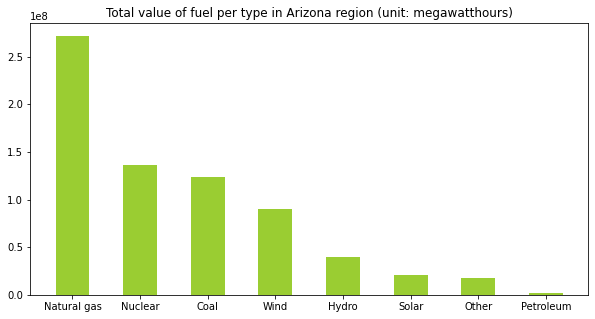

In [130]:
tna = dict(df_a['type-name'].value_counts())
for key in tna:
    tna[key] = 0
for idx, row in df_a.iterrows():
    try:
        tna[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tna = dict(sorted(tna.items(), key=lambda item: item[1], reverse=True))
plt.bar(tna.keys(), tna.values(), color='yellowgreen', width=0.5)
plt.title('Total value of fuel per type in Arizona region (unit: megawatthours)')
plt.show()

In [131]:
df_p = df.loc[df['timezone'] == 'Pacific']
df_p.head()

,Unnamed: 0,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
0,0.0,2022-11-17,BANC,Balancing Authority of Northern California,WAT,Hydro,Pacific,Pacific,3339,megawatthours
16,16.0,2022-11-17,IPCO,Idaho Power Company,SUN,Solar,Pacific,Pacific,1003,megawatthours
41,41.0,2022-11-17,IID,Imperial Irrigation District,OTH,Other,Pacific,Pacific,8567,megawatthours
73,73.0,2022-11-17,GRID,"Gridforce Energy Management, LLC",WND,Wind,Pacific,Pacific,8742,megawatthours
83,83.0,2022-11-17,CAL,California,COL,Coal,Pacific,Pacific,9392,megawatthours


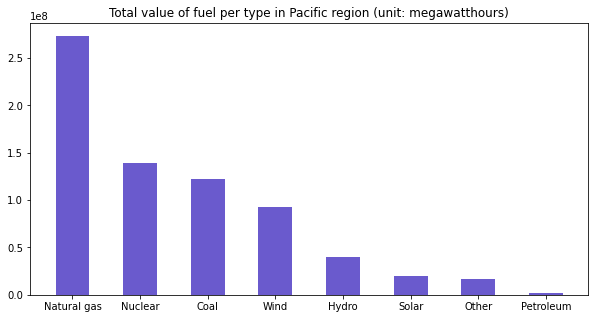

In [133]:
tnp = dict(df_p['type-name'].value_counts())
for key in tnp:
    tnp[key] = 0
for idx, row in df_p.iterrows():
    try:
        tnp[row['type-name']] += int(row['value'])
    except ValueError:
        continue
tnp = dict(sorted(tnp.items(), key=lambda item: item[1], reverse=True))
plt.bar(tnp.keys(), tnp.values(), color='slateblue', width=0.5)
plt.title('Total value of fuel per type in Pacific region (unit: megawatthours)')
plt.show()